In [32]:
from satellite_analysis.catalogreaders import consistentcatalogreader as consistent

input_dir = '/Users/user1/documents/GEN3/rockstarcomoving001/VELA07/hlists'

input_dir1 = '/Users/user1/documents/GEN6/rockstarcomoving001/VELA08/hlists'

consistent.consistent_catalog_reader(input_dir1)

Consistent File Indices: ['100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '500', '510', '520', '530', '540']

Using Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

Number of Halos found for snapshot 0 : 75
Number of Halos found for snapshot 1 : 122
Number of Halos found for snapshot 2 : 187
Number of Halos found for snapshot 3 : 260
Number of Halos found for snapshot 4 : 325
Number of Halos found for snapshot 5 : 370
Number of Halos found for snapshot 6 : 431
Number of Halos found for snapshot 7 : 447
Number of Halos found for snapshot 8 : 493
Number of Halos found for snapshot 9 : 503
Number of Halos found for snapshot 10 : 51

In [4]:
index_a_500 = 40


print(consistent.halo_data_sorted[index_a_500][0])

['0.50060', '837804', '0.51036', '848119', '93', '-1', '-1', '-1', '0', '8.51967e+11', '8.51500e+11', '235.867000', '19.037000', '249.260000', '1', '0.21020', '222.670000', '19.97498', '19.34668', '20.61242', '16.760', '73.840', '-74.760', '-6.094e+11', '1.602e+11', '-5.030e+11', '0.02824', '447', '4', '878592', '945', '40', '237265', '237264', '44', '0.00000', '-1', '19.1956', '867600000000', '855160000000', '824430000000', '681130000000', '394160000000', '17.8857', '8.55', '0.0322', '0.91128', '0.80096', '0.9738', '3.14961', '-2.94921', '0.90017', '0.76495', '-0.85168', '-2.576', '2.84004', '0.7224', '848400000000', '413400000000', '78.891', '8.51500e+11', '8.51500e+11', '222.670000', '225.560000', '0.27031', '1.624e+01', '1.624e+01', '3.330e+01', '6.120e+01', '4.491e+01', '-7.730e-12', '-5.980e-12', '0.50060', '0.50060', '0.50060', '8.515e+11', '222.670', '222.670', '0.00000', '-0.00560', '-1.00000', '837804']


In [5]:
import itertools
from numpy import linalg as LA

x_coords = []
y_coords = []
z_coords = []
count = 0
for halo in consistent.halo_data_sorted[index_a_500]:
    if halo[5] == consistent.halo_data_sorted[index_a_500][0][1]:
        
        x_coords.append(float(halo[17]))
        y_coords.append(float(halo[18]))
        z_coords.append(float(halo[19]))
        count = count + 1

print(count)

#first we generate all possible combinations of 3 satellites

list_of_satellite_combinations = list(itertools.combinations(range(count), 4))
print(len(list_of_satellite_combinations))

#now we set up the position of the central object

x_central = float(consistent.halo_data_sorted[index_a_500][0][17])
y_central = float(consistent.halo_data_sorted[index_a_500][0][18])
z_central = float(consistent.halo_data_sorted[index_a_500][0][19])

central_vector = np.array([[x_central], [y_central], [z_central]])

perpendicular_eigenvector = []

w_list, v_list = [], []

r0_list = []

distance_list = []

for satellite_combinations in list_of_satellite_combinations:
    x_1, y_1, z_1 = x_coords[satellite_combinations[0]], y_coords[satellite_combinations[0]], z_coords[satellite_combinations[0]] 
    x_2, y_2, z_2 = x_coords[satellite_combinations[1]], y_coords[satellite_combinations[1]], z_coords[satellite_combinations[1]] 
    x_3, y_3, z_3 = x_coords[satellite_combinations[2]], y_coords[satellite_combinations[2]], z_coords[satellite_combinations[2]]
    x_4, y_4, z_4 = x_coords[satellite_combinations[3]], y_coords[satellite_combinations[3]], z_coords[satellite_combinations[3]] 
    
    vector_1 = np.array([[x_1], [y_1], [z_1]])
    vector_2 = np.array([[x_2], [y_2], [z_2]])
    vector_3 = np.array([[x_3], [y_3], [z_3]])
    vector_4 = np.array([[x_4], [y_4], [z_4]])
    
    #first, calculate the centroid
    
    r0 = (1/4)*(vector_1 + vector_2 + vector_3 + vector_4)
    #second, calculate the moment of inertia tensor
    
    #print(central_vector)
    #print(vector_1)
    #print(vector_2)
    #print(vector_3)
    #print(r0)
    
    T0 = np.array([[0,0,0], [0,0,0], [0,0,0]])
    unit = np.array([[1,0,0], [0,1,0], [0,0,1]])
    for vectors in [vector_1, vector_2, vector_3, vector_4]:
        distance = vectors - r0
        distance_T = distance.transpose()[0]
        T0 = T0 + (((np.dot(distance_T, distance_T))*unit)-((distance)*(distance).transpose())) 
        
    w, v = LA.eig(T0)
    
    #now we sort the two lists so we can calc a,b,c
    
    w_sorted = np.array([0., 0., 0.])
    v_sorted = np.array([[0.,0.,0.], [0.,0.,0.], [0.,0.,0.]])
    
    for index in range(3):
        #this will break if two of the eigenvectors are the same and return one element as [0., 0., 0.]
        current_w = w[index]
        current_v = v[index]
        pos = [i for i,x in enumerate(np.sort(w)) if x == current_w][0]
        
        w_sorted[pos] = current_w
        v_sorted[pos] = current_v
    
    

    #now that they are sorted, the largest eigenvalue(representing the eigenvalue of the normal to the plane vector)
    #will always be the third element of the array, with the eigenvector being the 3 arrary of the array of v
    
    #finally we calculate the distance between the center of the plane and the host center
    central_vector_T = central_vector.transpose()
    r0_T = r0.transpose()
    central_plane_distance = (central_vector_T - r0_T)[0]
    
    host_distance = np.dot(central_plane_distance, central_plane_distance)
    
    w_list.append(w_sorted)
    v_list.append(v_sorted)
    r0_list.append(r0)
    distance_list.append(host_distance)

28
20475


20475
97
0.731822267006399


<IPython.core.display.Javascript object>


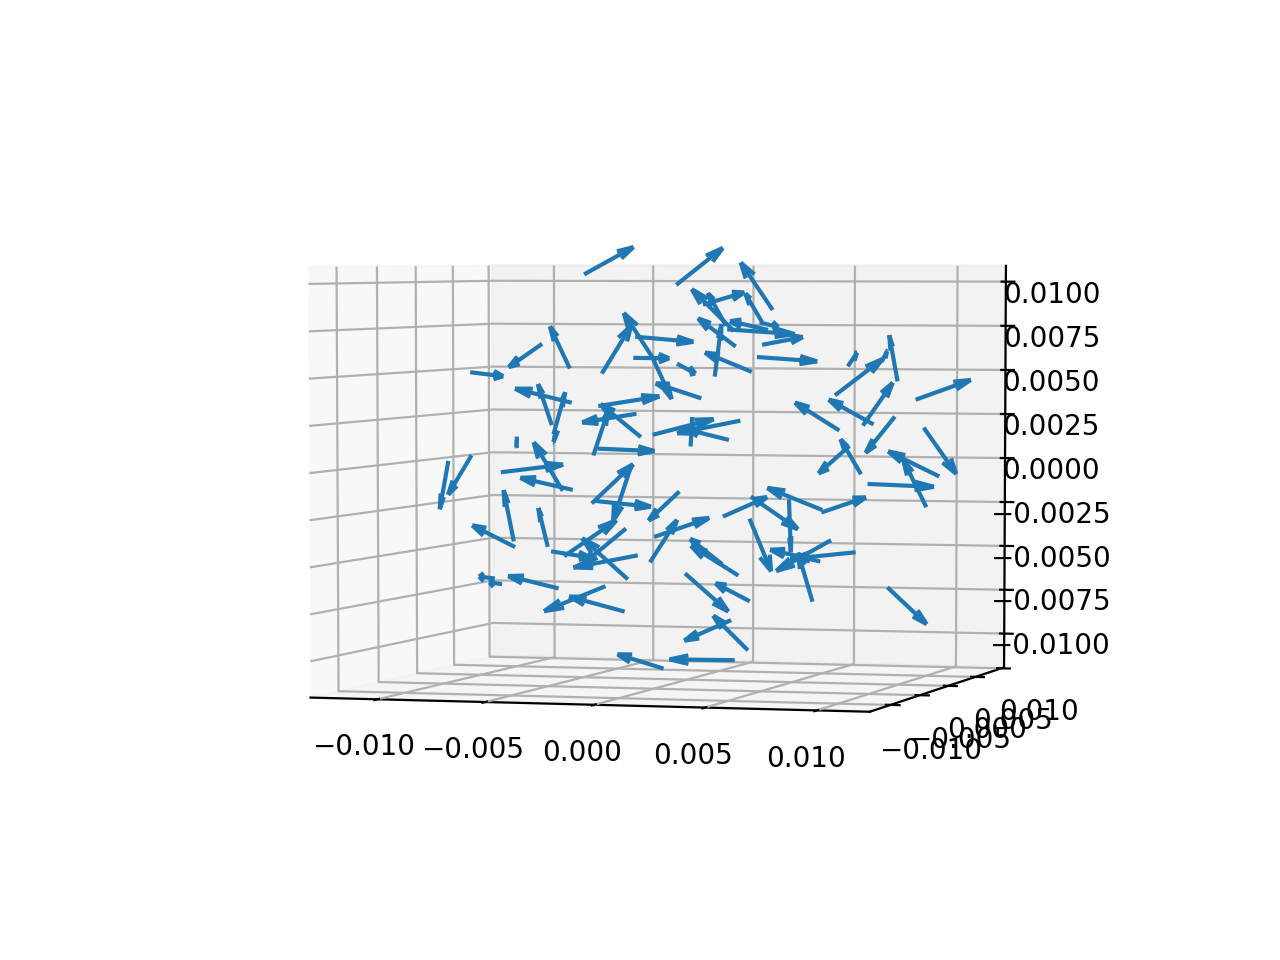

In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#make the arrays
x_coord, y_coord, z_coord = [], [], []
u0, v0, w0 = [], [], []
for index in range(len(r0_list)):
    if distance_list[index] < .00015:
        x_coord.append(float(r0_list[index][0]) - largest_x)
        y_coord.append(float(r0_list[index][1]) - largest_y)
        z_coord.append(float(r0_list[index][2]) - largest_z)
        
        u0.append(v_list[index][2][0])
        v0.append(v_list[index][2][1])
        w0.append(v_list[index][2][2])
    
    
print(len(r0_list))
print(len(x_coord))
print(u0[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(x_coord, y_coord, z_coord, u0, v0, w0, length=.003)

plt.show()




In [24]:
import healpy as hp

largest_x = float(consistent.halo_data_sorted[index_a_500][0][17])
largest_y = float(consistent.halo_data_sorted[index_a_500][0][18])
largest_z = float(consistent.halo_data_sorted[index_a_500][0][19])

#make the lists for storing the spherical coords after they are found
theta = []
phi = []

x_test = []
y_test = []
z_test = []
#first we get the paramaters of the lines to find the sphere intersections

for index in range(len(r0_list)):
    if distance_list[index] < .0003:
        x = float(r0_list[index][0]) - largest_x
        y = float(r0_list[index][1]) - largest_y
        z = float(r0_list[index][2]) - largest_z
        o = np.array([x, y, z])
        
        v1 = v_list[index][2][0]
        v2 = v_list[index][2][1]
        v3 = v_list[index][2][2]
        magnitude_v = (v1*v1 + v2*v2 +v3*v3)**(1/2)
        l = np.array([v1/magnitude_v, v2/magnitude_v, v3/magnitude_v])
        
        #the method for finding the intersections can be found here https://en.wikipedia.org/wiki/Line%E2%80%93sphere_intersection
        #we are finding their intersections with a circle radius r = .017, as the largest value is around 0.016
        
        #we also took the center of the central object out of each coord to make c = (0,0,0)
        r = 0.17
        sqrt = (np.dot(l, o))*(np.dot(l, o)) - (np.dot(o, o) - r*r)
        
        if sqrt > 0:
            d1 = (-(np.dot(l, o))) + sqrt**(1/2)
            d2 = (-(np.dot(l, o))) - sqrt**(1/2)
            
            intercept1 = o + d1*l
            intercept2 = o + d2*l
            x_test = x_test + [intercept1[0], intercept2[0]]
            y_test = y_test + [intercept1[1], intercept2[1]]
            z_test = z_test + [intercept1[2], intercept2[2]]
            #x_test = x_test + [intercept1[0]]
            #y_test = y_test + [intercept1[1]]
            #z_test = z_test + [intercept1[2]]
            
            #now convert the intercepts to spherical coords (based on these http://mathworld.wolfram.com/SphericalCoordinates.html)
            theta1 = np.arctan(intercept1[1]/intercept1[0])
            phi1 = np.arccos(intercept1[2]/r)
            
            theta2 = np.arctan(intercept2[1]/intercept2[0])
            phi2 = np.arccos(intercept2[2]/r)
            
            theta = theta + [theta1, theta2]
            phi = phi + [phi1, phi2]
        
        if sqrt == 0:
            d1 = (-(np.dot(l, o)))
            intercept1 = o + d1*l
            x_test = x_test + [intercept1[0]]
            y_test = y_test + [intercept1[1]]
            z_test = z_test + [intercept1[2]]
            
            theta1 = np.arctan(intercept1[1]/intercept1[0])
            phi1 = np.arccos(intercept1[2]/r)
            
            theta = theta + [theta1, theta2]
            phi = phi + [phi1, phi2]
            
        if sqrt < 0:
            print('sqrt is negative, something went wrong with r?')


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp


NSIDE = 32
NPIX = hp.nside2npix(NSIDE)

vectors = []
#for x in range(len(theta)):
    #vectors.append([phi[x], theta[x]])
#m = np.arange(NPIX)
#for coord in vectors:
    #ipix_disc = hp.query_disc(nside=32, vec=coord, radius=np.radians(1))
    #m[ipix_disc] = m.max()

hp.mollview(m, title="Mollview image RING")
hp.graticule()

NameError: name 'theta' is not defined

<IPython.core.display.Javascript object>


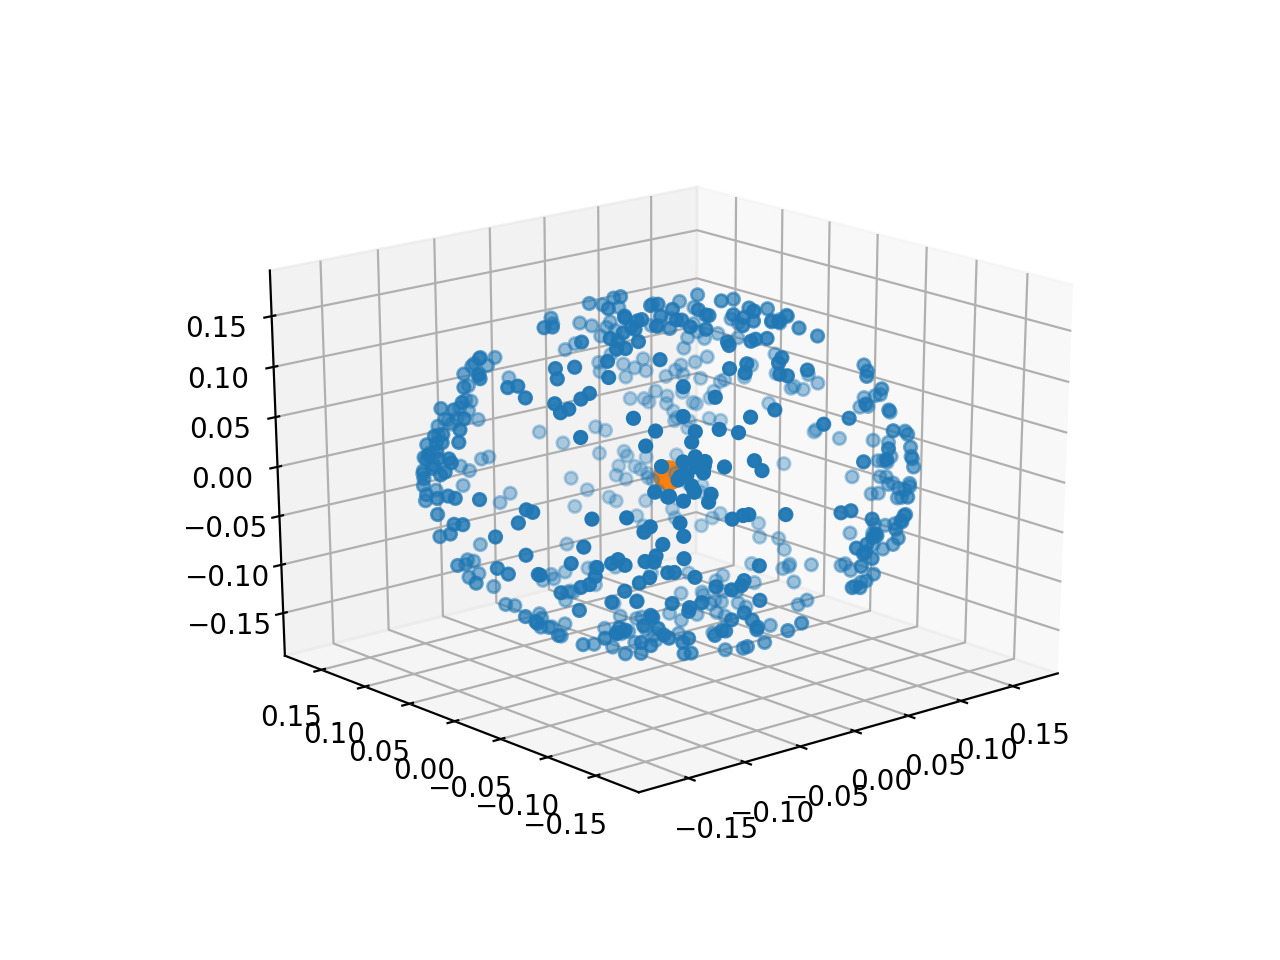

[-0.004457499999997339, -0.006972499999996273, -0.007597499999999258, -0.00035749999999978854, -0.0003299999999981651, 0.0011600000000022703, -0.0020424999999981708, 0.0036349999999991667, -0.003992499999998955, 0.004295000000002602, 0.00813500000000289, 0.006147500000000861, 0.002027500000000515, -0.011214999999999975, -0.009074999999999278, 0.0009350000000019065, 0.0009624999999999773, -0.0017025000000003843, 0.004415000000001612, -0.0054849999999966315, 0.007157500000001704, 0.0030050000000017008, -0.00026249999999805596, -0.003072499999998257, -0.006869999999999266, -0.000722499999998405, -0.007070000000002352, -0.001392500000001462, -0.000727499999999992, -0.004082499999999101, -0.007979999999996323, 0.006107500000002375, -0.0024249999999987892, -0.004650000000001597, -0.0004949999999972476, 0.0007025000000027148, -0.002482499999999277, 0.008172500000000582, -0.0007174999999968179, -0.006582499999996827, 0.0034375000000004263, 0.010717500000001934, -0.004514999999997826, -0.009932

In [25]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#make the arrays


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


print(x_coord)
ax.scatter(x_test, y_test, z_test, norm=0.001)
ax.scatter(0,0,0, s = 100)
#ax.scatter(largest_x, largest_y, largest_z, s=100)
plt.show()

[-0.01653999999999911, 0.08338000000000179, -0.1227199999999975, 0.08744000000000085, 0.029930000000000234, -0.13741999999999877, -0.06557999999999709, 0.0791700000000013, -0.14746999999999844, 0.009060000000001622, 0.04678000000000182, 0.05274000000000001, -0.11910999999999916, 0.18468000000000018, 0.023730000000000473, -0.04528999999999783, -0.11899999999999977, -0.07580999999999705, -0.14806999999999704, 0.06894000000000133, -0.05987999999999971, 0.07557000000000258, 0.038050000000001916, 0.003920000000000812, -0.03183999999999898, -0.022579999999997824, 0.13407000000000124, 0.1173800000000007]
28


<IPython.core.display.Javascript object>


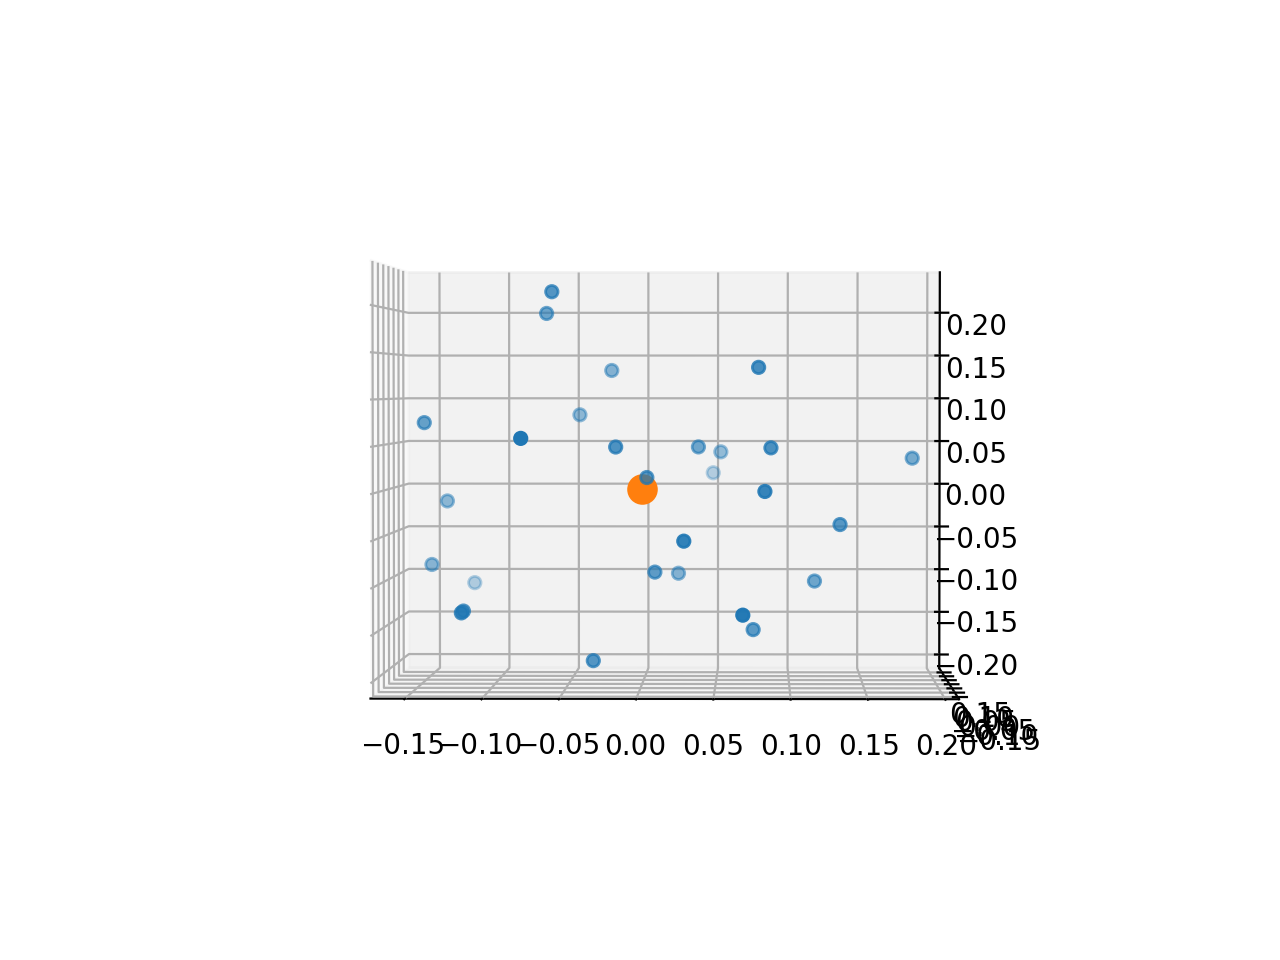

[-0.01653999999999911, 0.08338000000000179, -0.1227199999999975, 0.08744000000000085, 0.029930000000000234, -0.13741999999999877, -0.06557999999999709, 0.0791700000000013, -0.14746999999999844, 0.009060000000001622, 0.04678000000000182, 0.05274000000000001, -0.11910999999999916, 0.18468000000000018, 0.023730000000000473, -0.04528999999999783, -0.11899999999999977, -0.07580999999999705, -0.14806999999999704, 0.06894000000000133, -0.05987999999999971, 0.07557000000000258, 0.038050000000001916, 0.003920000000000812, -0.03183999999999898, -0.022579999999997824, 0.13407000000000124, 0.1173800000000007]


In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#make the arrays

largest_x = float(consistent.halo_data_sorted[index_a_500][0][17])
largest_y = float(consistent.halo_data_sorted[index_a_500][0][18])
largest_z = float(consistent.halo_data_sorted[index_a_500][0][19])

x_coord = []
y_coord = []
z_coord = []
count = 0
for halo in consistent.halo_data_sorted[index_a_500]:
    if halo[5] == consistent.halo_data_sorted[index_a_500][0][1]:
        
        x_coord.append(float(halo[17])-largest_x)
        y_coord.append(float(halo[18])-largest_y)
        z_coord.append(float(halo[19])-largest_z)
        count = count + 1
print(x_coord)
print(count)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


print(x_coord)
ax.scatter(x_coord, y_coord, z_coord, norm=0.001)
ax.scatter(0,0,0, s = 100)
#ax.scatter(largest_x, largest_y, largest_z, s=100)
plt.savefig('')
plt.show()


[20.4737, 20.54796, 20.42389, 20.41122, 20.49357, 20.42537, 20.41789, 20.6711, 20.37955, 20.31933, 20.44119, 20.33746, 20.56838, 20.39053, 20.29675, 20.56933, 20.59728, 20.45005, 20.35951, 20.4413, 20.28551, 20.3592, 20.30798, 20.47126, 20.55982, 20.56383, 20.46706, 20.37236, 20.28139, 20.34318, 20.55224, 20.63978, 20.55006, 20.50145, 20.58399, 20.36614, 20.61787, 20.50719, 20.49706, 20.41048, 20.59479]


<IPython.core.display.Javascript object>


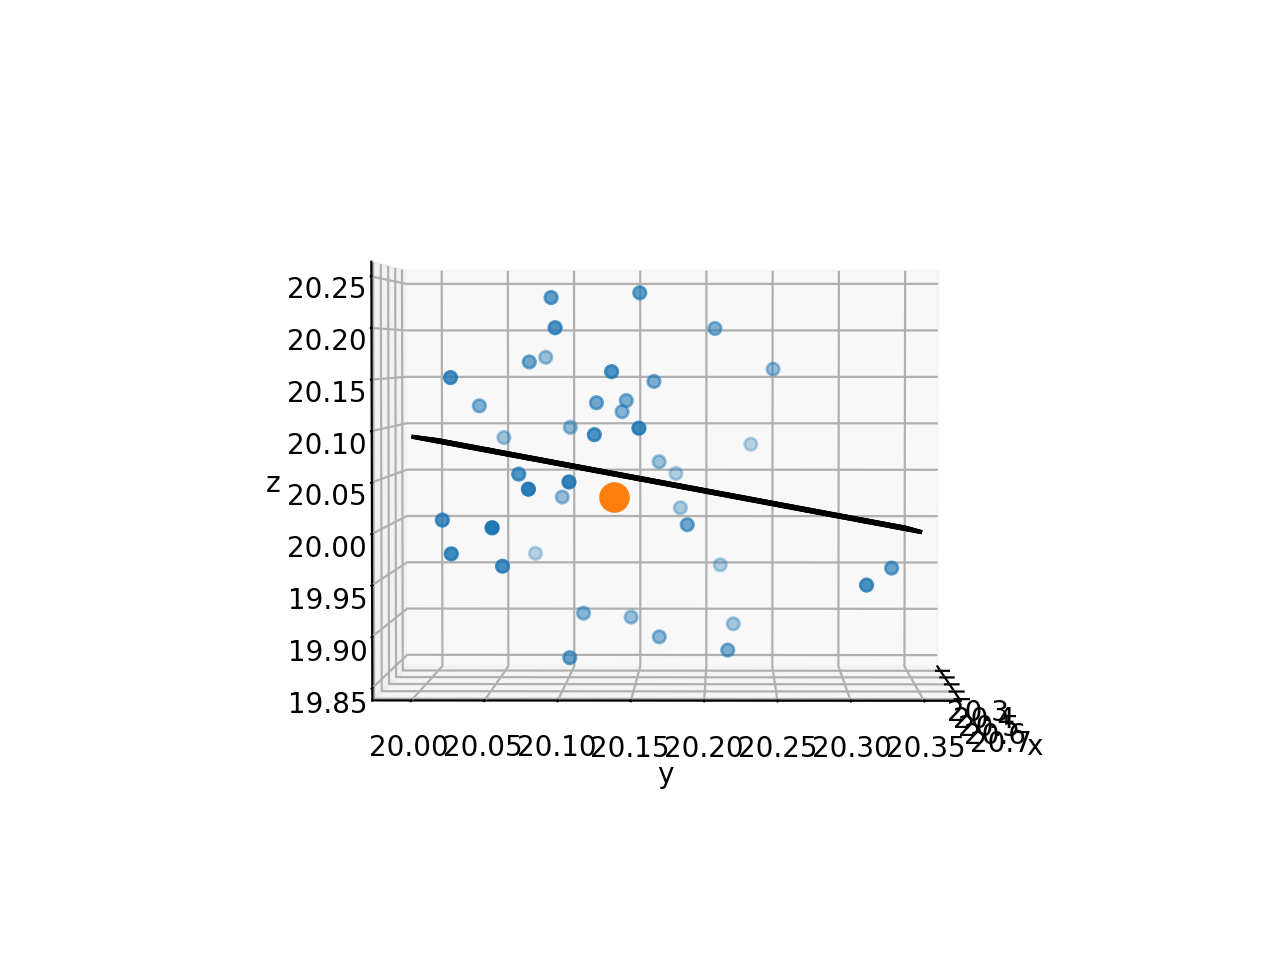

solution:
0.027272 x + -0.266487 y + 24.859160 = z
errors:
[[-0.03816894]
 [-0.01809079]
 [ 0.044108  ]
 [-0.15113199]
 [ 0.18952526]
 [ 0.1697049 ]
 [ 0.06574236]
 [-0.07480512]
 [-0.03474604]
 [-0.02337122]
 [ 0.07785631]
 [-0.13533472]
 [ 0.06624481]
 [ 0.0396894 ]
 [ 0.01205254]
 [-0.07850271]
 [-0.11002296]
 [-0.16002852]
 [ 0.10838808]
 [ 0.10288571]
 [-0.10128136]
 [ 0.02113022]
 [-0.07613833]
 [ 0.06947468]
 [ 0.03595343]
 [-0.06412177]
 [ 0.09850591]
 [-0.14723834]
 [ 0.05816807]
 [ 0.01604307]
 [ 0.10270133]
 [-0.03051596]
 [ 0.13633995]
 [-0.19610332]
 [-0.11319555]
 [ 0.14045057]
 [-0.0160074 ]
 [ 0.16737114]
 [-0.04312163]
 [-0.1610604 ]
 [ 0.05065133]]
residual:
0.6489313722094993
(20.2619045, 20.690585499999997)
[20.2619045]


In [36]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#make the arrays

largest_x = float(consistent.halo_data_sorted[40][0][17])
largest_y = float(consistent.halo_data_sorted[40][0][18])
largest_z = float(consistent.halo_data_sorted[40][0][19])

x_coord = []
y_coord = []
z_coord = []

for halo in consistent.halo_data_sorted[40]:
    if halo[5] == consistent.halo_data_sorted[40][0][1]:
        x_coord.append(float(halo[17]))
        y_coord.append(float(halo[18]))
        z_coord.append(float(halo[19]))
        
print(x_coord)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_coord, y_coord, z_coord, norm=0.001)
ax.scatter(largest_x, largest_y, largest_z, s=100)
#plt.show()


# do fit
tmp_A = []
tmp_b = []
for i in range(len(x_coord)):
    tmp_A.append([x_coord[i], y_coord[i], 1])
    tmp_b.append(z_coord[i])
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print("solution:")
print("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print("errors:")
print(errors)
print("residual:")
print(residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.linspace(xlim[0], xlim[1], 10),
                  np.linspace(ylim[0], ylim[1], 10))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='k')
print(xlim)
print(np.arange(xlim[0], xlim[1], 10))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


In [111]:
print(v_list[0][2][0])

0.4131698412389535
